<a href="https://colab.research.google.com/github/gimoonnam/AI-for-trading/blob/master/TimeSeriesModeling/Time_series_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import sys
import pandas as pd
import numpy as np
import os
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
sns.set()

In [0]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] =(10,4)

# simulate return series with autoregressive properties 



In [0]:
from statsmodels.tsa.arima_process import ArmaProcess

np.random.seed(200)

ar_params = np.array([1, -0.5])   
ma_params = np.array([1, -0.3]) 

ret = ArmaProcess(ar_params, ma_params).generate_sample(nsample=5*252)

In [0]:
ret = pd.Series(ret)
drift = 100
price = pd.Series(np.cumsum(ret)) + drift

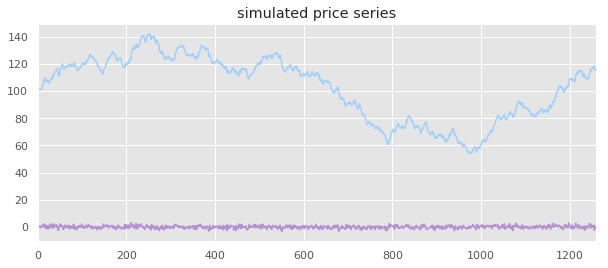

In [0]:
ret.plot(figsize=(10,4), color=sns.xkcd_rgb["pale purple"], title="simulated return series")
price.plot(figsize=(10,4), color=sns.xkcd_rgb["baby blue"], title="simulated price series")
plt.show()

# Log returns and autocorrelation 

In [0]:
lret = np.log(price) - np.log(price.shift(1))
lret = lret[1:]

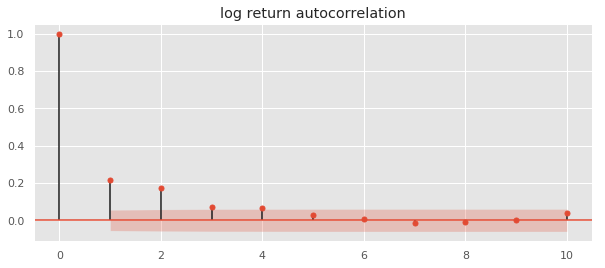

In [0]:
from statsmodels.graphics.tsaplots import plot_acf
_=plot_acf(lret, lags=10, title='log return autocorrelation')

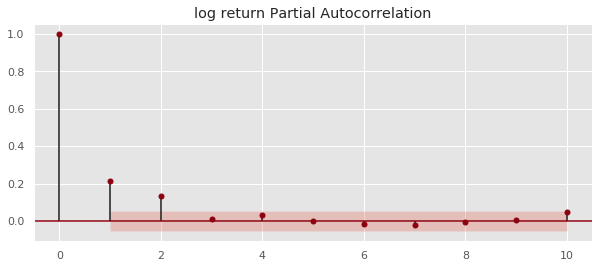

In [0]:
from statsmodels.graphics.tsaplots import plot_pacf
_ = plot_pacf(lret, lags=10, title='log return Partial Autocorrelation', color=sns.xkcd_rgb["crimson"])

##Ljung-Box test 
to check whether the chosen lag gives autocorrelations that are significantly different from zero 

In [0]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [0]:
lb_test_stat, lb_p_value = acorr_ljungbox(lret,lags=20)
lb_p_value

array([2.01640711e-14, 1.24123312e-21, 5.10501473e-22, 1.86446247e-22,
       6.13688232e-22, 2.96811370e-21, 1.18392407e-20, 4.64232373e-20,
       1.78935377e-19, 2.36770725e-19, 5.54712773e-19, 1.32980392e-18,
       3.72359442e-18, 5.86709112e-18, 1.72205886e-17, 4.22143078e-17,
       1.15704571e-16, 9.89290170e-17, 2.59299780e-16, 1.50593115e-16])

Here p_value for a given period of lag is much smaller than 0.05, then the null hypothesis can be rejected, and the past lags have some correlation with the current period 

## Fit an ARMA model 
to extract AR and MA parameters from the log return data 
using ARMA (p=1, q=1) model 

In [0]:
from statsmodels.tsa.arima_model import ARMA

In [0]:
AR_lag_p = 1
MA_lag_q = 1
order = (AR_lag_p, MA_lag_q)
arma_model = ARMA(lret.values, order=order)
arma_result = arma_model.fit()
arma_pred = pd.Series(arma_result.fittedvalues)


Fitted AR parameter 0.65, MA parameter -0.45


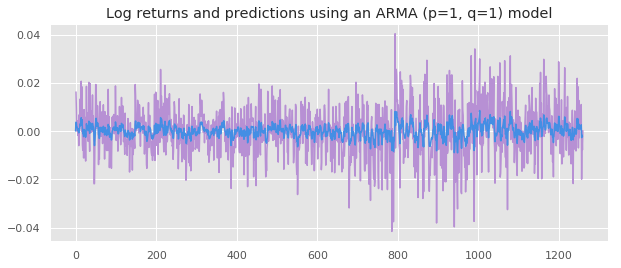

In [0]:
plt.plot(lret, color=sns.xkcd_rgb["pale purple"])
plt.plot(arma_pred, color=sns.xkcd_rgb["dark sky blue"])
plt.title('Log returns and predictions using an ARMA (p=1, q=1) model')
print(f"Fitted AR parameter {arma_result.arparams[0]:.2f}, MA parameter {arma_result.maparams[0]:.2f}")